** Вопросы **
1. Какие уравнения называют линейными?
1. В чём состоит задача линейного программирования?



# Расчёт балки c распределённой нагрузкой по предельным состояниям

(Введение в нелинейную строительную механику, О. Л. Рудных, стр 88, пример 1.)


Для заданной схемы требуется определить места образования пластических шарниров, предельное значение нагрузки $q$ выраженное через предельный момент

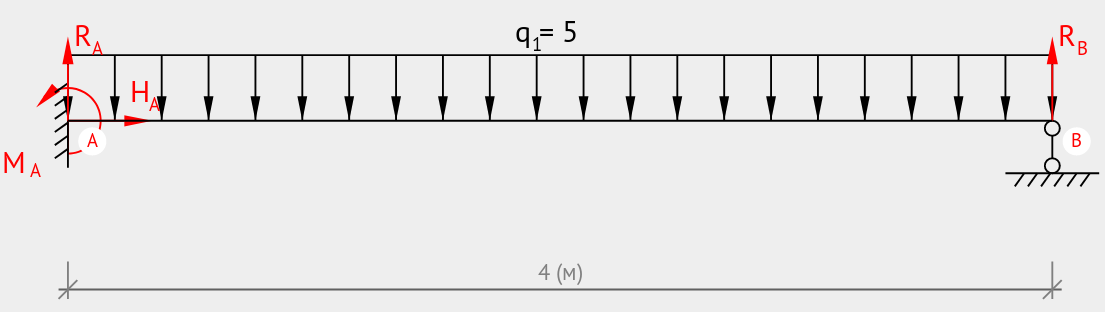

### Аналитическое решение

- Это статически неопределимая балка, значит возникает 2 плстических шарнира
- Пластическое шарниры: 
    - в точке А, 
    - где-то в пролёте AB
- Нужно найти:
    - Предельное значение нагрузки q
    - положение второго пластического шарнира -- расстояние z от точки B до шарнира

**Решим задчу аналитически**
- Изобразим реакции связей
- Далее определим нагрузку через платический момент $M_{пл}$

- Запишем уравнение для внутреннего момента с координатой z (отсчитывается от т. B)\
(1) &nbsp; $ M^{прав} = R_B \cdot z - q \cdot \frac{z}{2} \cdot z $

- Найдём максимальный момент на отрезке AB продифференцировав M по z и прировняв производную к нулю\
$ R_B - q \cdot z = 0 $
- Максимальный момент будет при:\
$ R_B = q \cdot z_{max}$\
(2) &nbsp; $ z_{max} = \frac{R_B}{q}$

Определим максимальный момент на учаске AB подставив (2) в (1):\
&nbsp; $ M_{max} = \frac{R_B^2}{q} - q \frac{R_B^2}{2 q^2 }   $ \
&nbsp; $ M_{max} = \frac{R_B^2}{2 q} $

Этот наибольший момент должен быть меньше или равен пластическому: \
&nbsp; $ M_{max} = \frac{R_B^2}{2 q} \le M_{пр}$ 

Наконец выразим нагрузку через предельный момент: \
(3) &nbsp; $ q \ge \frac{R_B^2}{2 M_{пр}}$

Это неравенство описывает платический шарнир на участке AB.


Пластический шарнир возникает ещё в точке A. Выразим нагрузку q через $M_{пр}$ и для этой точки, подставив $z = l$  в уравнение (1) \
$ M_{max} = R_B \cdot l - q \cdot \frac{l}{2} \cdot l  \le M_{пр}$


выразим q: \
(4) &nbsp; $ q \le \frac{2 M_{пр} }{l^2} +  \frac{2 R_B}{l}   $

Таким образом получили два неравенства,

(3) &nbsp; $ q \ge \frac{R_B^2}{2 M_{пр}}$ \
(4) &nbsp; $ q \le \frac{2 M_{пр} }{l^2} +  \frac{2 R_B}{l}   $

в которых присутствует искомые $z$ и $q$, а также неизвестная реакция связей $R_B$.

При этом, нужно найти максимальное значение $q$ удоавлетворяющее этим неравенствам,
т.е.

$ q \rightarrow max$

Построим графики в координатах $q$ и $R_B$

In [1]:
# для запуска в mybinder.com:
# установка модулей
# убрать символ # в начале следующих строк и запустить ячейку
# !pip install numpy
# !pip install scipy
# !pip install seaborn

In [2]:
import numpy as np
from scipy.optimize import linprog, minimize
from matplotlib.pyplot import *  # для построения графиков

# выводить 4 знака после запятой, выводить маленькие (по модулю) числа как 0
np.set_printoptions(precision=2, suppress=True)

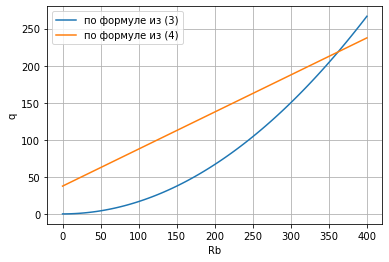

In [15]:
absM = 300  # kH*m
l = 4  # m

# сделаем из неравенств (3) и (4) равенства и построим графики в координатах Rb - q
# для этого запишем q как функцию от Rb: q = f(Rb):
q1 = lambda Rb: Rb**2 / 2 / absM        # формула (3)
q2 = lambda Rb: 2*absM/l**2 + 2*Rb/l   # формула (4)

# для построения графика по точкам создадим набор из значений (100 штук) Rb от 0 до 450
Rb = np.linspace(0, 400, 100)

# построим графики: первый параметр - набор абсцисс, второй - набор значений ординат, третий - подпись к графику
plot(Rb, q1(Rb), label='по формуле из (3)')
plot(Rb, q2(Rb), label='по формуле из (4)')
xlabel('Rb')   # подпись к оси абсцисс
ylabel('q')    # подпись к оси ординат
legend(loc='best')   # добавить легенду
grid()    # показать координатную сетку

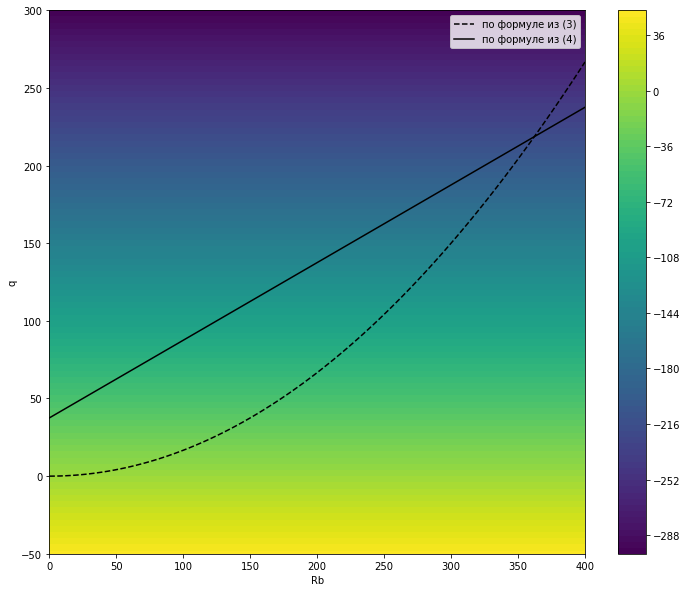

In [18]:
# Дополнительно: Тепловая карта целевой функции
X = np.linspace(0, 400, 100)  # набор абсцисс
Y = np.linspace(-50, 300, 100)  # набор ординат
func = np.vectorize(lambda Rb,q: -q)  # целевая функция f(Rb,q) = -q
xx,yy = np.meshgrid( X, Y)    # создание набора точек не плоскости для вычисления функции двух переменных
zz = func(xx,yy)              # вычисление целевой функции 

figure( figsize=(12,10))
plot(Rb, q1(Rb), '--', color='black', label='по формуле из (3)')
plot(Rb, q2(Rb),       color='black', label='по формуле из (4)')
contourf(xx, yy, zz, 100)     # построение тепловой карты
colorbar()                    # показать масштаб
legend(loc='best')            # добавить легенду
xlabel('Rb')                  # подпись к оси абсцисс
ylabel('q')                   # подпись к оси ординат
show()

Два графика выше определяют область значений в которой нужно максимизировать целевую функцию

- неравенство (3) ограничивает область выше кривой
- неравенство (4) ограничивает область ниже прямой


Так как целевая функция требует максимизировать q, то просто выберем в области заданной неравенствами точку с наибольшим значением q.

Это точка пересечения двух графиков. Найдём её

$ \frac{R_B^2}{2 M_{пр}} = \frac{2 M_{пр} }{l^2} +  \frac{2 R_B}{l}   $

Это уравнение имеет два решения:

$ R_B \approx 4.82843 M_{пр}/l $

$ R_B \approx -0.828427 M_{пр}/l $

Второй вариант очевидно не подходит для точки пересечения кривых изображённый на графике.

Превратив 2 в равенство, подставим полученное значение $ R_B $ и найдём q:

$ q \approx \frac{11.6 M_{пр}}{l^2} $

Кроме нагрузки требуется ещё и определить место образования пластического шарнира. Определим z из уравнения (2):

$ z \approx 0.414 l$

#### Ответ

$ q \approx \frac{11.6 M_{пр}}{l^2} $

Пластические шарниры образуются в т A и на расстоянии z от точки B( z отсчитывается влево)

$ z \approx 0.414 l$


In [5]:
l = 4
absM = 300

Rb = 4.82 * absM / l
q = 11.6 * absM / l**2
z = 0.414 * l

print("Rb = ",Rb, "kH")
print("q = ",q, "kH/m")
print("z = ",z, "m")

Rb =  361.5 kH
q =  217.5 kH/m
z =  1.656 m


## Решение кинематическим способом
1. Изобразим кинематически возможную систему (вариант деформирования с образованием пластических шарниров)
1. Обозначим возможные перемещения и изобразим пластические моменты
1. Отдельно вычислим работу распределённой силы
1. Применим принцип возможных перемещений
1. Выразим одно возможное перемещение через другое
1. Выразим q через z и Mпр.
1. Найдём максимум функции q(z) приравняв её производную (по z) к нулю.

## Решение методом нелинейного программирования

In [22]:
from scipy.optimize import minimize  # для нелинейного программирования

# параметры задачи
absM = 300  # kH*m;  предельный момент
l = 4       # m;     длина балки


# здесь и далее целевая функция и ограничения будут описаны как функции на зяыке программирования Python
# эти функции должны иметь единственный параметр - массив
# нумерация элементов массива начинается с 0

# после названия функции (например def objective(x) ) рекомендуется записать в тройных войных кавычках
# смысл каждого элемента массива X, т.е. сопоставить из с переменными задачи


# целевая функция
def opt_fun(x):
    """ x[0] - Rb
        x[1] - q
    """ 
    return -x[1]
    # знак минус перед x[1] стоит потому, что программа будет минимизировать значение, 
    # но поставленная задача требует максимизации

# эта функция аналогична математической записи: objective(x0, x1) = -x1


# ограничения записываются в виде:
# выражение > 0
# где выражение - математическое выражение
# само выражение записывается после return


# ограничение 1: (по уравнению 4)
def constr1(x):
    """ x[0] - Rb
        x[1] - q
    """ 
    return - x[0]**2 / 2 / absM + x[1]
# нумерация массива начинается с 0


# ограничение 2: (по уравнению 3)
def constr2(x):
    """ x[0] - Rb
        x[1] - q
    """ 
    return  -x[1] + 2*absM/l**2 + 2*x[0]/l


# начальные значения
# если решение не получается, то стоит поменять начальные значения
x0 = [100, 100]

# запишем функции в список ограничений
cons = [{}, {}]

# структура данных в фигурных скобках описывает тип уравнения (ineq - неравенство) и само неравенство
cons[0] = {'type':'ineq', 'fun': constr1}  
cons[1] = {'type':'ineq', 'fun': constr2} 

# bounds - ограничения для переменных
bounds=( (0,1000), (0,1000) )

# поиск решения 

# ответ будет записан в переменную x
minimize(opt_fun, x0, constraints=cons, bounds=bounds, method="SLSQP")
# доступные методы решения задачи: COBYLA, SLSQP, ...

     fun: -218.56601717798853
     jac: array([ 0., -1.])
 message: 'Optimization terminated successfully.'
    nfev: 73
     nit: 15
    njev: 14
  status: 0
 success: True
       x: array([362.13, 218.57])

In [7]:
z = 362.13/218.57      # по формуле (2)
print(f"z={z:.2f} m")

z=1.66 m


**Ответ**

$ R_B \approx x_0 = 362.13 $ kH

$ q \approx x_1 = 218.57$ kH/m

$ z \approx 1.66$ m

### Нелинейное программирование
Другой способ задания ограничений

In [8]:
from scipy.optimize import minimize  # для нелинейного программирования

# параметры задачи
absM = 300  # kH*m;  предельный момент
l = 4       # m;     длина балки


# здесь и далее целевая функция и ограничения будут описаны как функции на зяыке программирования Python
# эти функции должны иметь единственный параметр - массив
# нумерация элементов массива начинается с 0

# после названия функции (например def objective(x) ) рекомендуется записать в тройных войных кавычках
# смысл каждого элемента массива X, т.е. сопоставить из с переменными задачи


# целевая функция
def opt_fun(x):
    """ x[0] - Rb
        x[1] - q
    """ 
    return -x[0]
    # знак минус перед x[1] стоит потому, что программа будет минимизировать значение, 
    # но поставленная задача требует максимизации

# эта функция аналогична математической записи: objective(x0, x1) = -x1


# ограничения записываются в виде:
# выражение > 0
# где выражение - математическое выражение
# само выражение записывается после return


# начальные значения
# если решение не получается, то стоит поменять начальные значения
x0 = [100, 100]

# запишем функции в список ограничений
cons = []

# структура данных в фигурных скобках описывает тип уравнения (ineq - неравенство) и левая часть неравенства
# x0 - Rb
# x1 - q
cons += [ {'type':'ineq', 
           'fun': lambda x: - x[0]**2 / 2 / absM + x[1]}  ]

cons += [ {'type':'ineq', 
           'fun': lambda x: -x[1] + 2*absM/l**2 + 2*x[0]/l} ] 

# поиск решения 
# bounds - ограничения для переменных
# ответ будет записан в переменную x
minimize(opt_fun, x0, constraints=cons, 
         bounds=( (0,1000), (0,1000) ), method="SLSQP")

# метод нелинейного программирования SLSQP - Sequential linear-quadratic programming

     fun: -362.1320343559724
     jac: array([-1.,  0.])
 message: 'Optimization terminated successfully.'
    nfev: 49
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([362.13, 218.57])

In [9]:
11.6 * 300 / 16

217.5